# *2. Будем предсказывать!*
[Вот тут подробная статья](https://habr.com/ru/company/ods/blog/323730/)
<img src="https://habrastorage.org/r/w1560/files/812/803/40b/81280340b5c74e018e764a4dbea13f42.jpeg" width="200" height="200" />

К вам поступила информация о числе заказов за прошедшие 3 месяца с разрешением по неделям. Постройте (если это возможно) прогноз продаж на следующие 3 месяца, с учётом того, что в неделю с 2020-02-02 по 2020-02-09 была проведена массивная акция, повысившая число заказов на 7%

In [4]:
import pandas as pd
from fbprophet import Prophet

In [5]:
df = pd.read_csv('test2_completed.csv')
df

,Дата,Число заказов
0,2020-01-05,650
1,2020-01-12,837
2,2020-01-19,1020
3,2020-01-26,1176
4,2020-02-02,1489
5,2020-02-09,1823
6,2020-02-16,1991
7,2020-02-23,2166
8,2020-03-01,2334
9,2020-03-08,2607


**Подскажем prophet'у, как учесть пару недель с повышенными продажами** 

In [6]:
df_holidays = pd.DataFrame(columns=['ds', 'holiday'])
df_holidays.ds = pd.to_datetime(['2020-02-02', '2020-02-09'])
df_holidays.holiday = 'sale'
df_holidays

,ds,holiday
0,2020-02-02,sale
1,2020-02-09,sale


In [7]:
df.columns = ['ds', 'y']
df.ds = pd.to_datetime(df.ds)

**Обучаем, предсказываем, строим**

In [8]:
f = Prophet(holidays=df_holidays)
f.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.


In [9]:
future = f.make_future_dataframe(periods=3, freq='M')
forecast = f.predict(future)

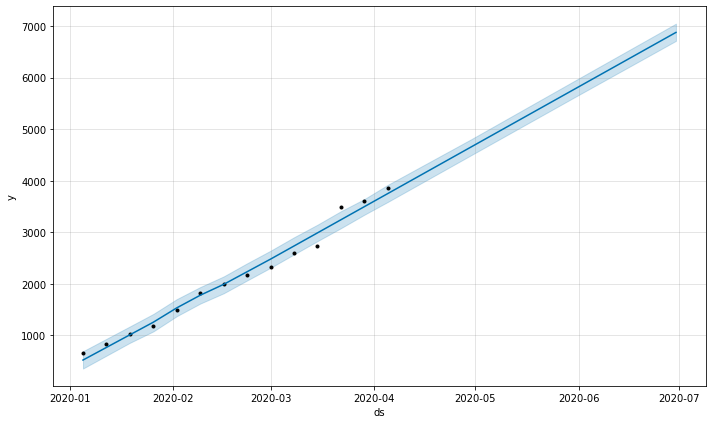

In [10]:
f.plot(forecast);

**По-моему строить прогнозы всего по 14 точкам не самая удачная идея, зато красиво)**